# Python Assignment 1

Name: Chai Pin Zheng 

Admission No: P2026338

Teacher: Wilson Qiu ZiXuan

Class: EL/EP0302/FT/02

## Introduction
In this report, I'll be using 3 government datasets to analyze Singapore Health Care system which is
- hospital-admissions-and-public-sector-outpatient-attendances-annual.csv https://data.gov.sg/dataset/hospital-admissions-and-public-sector-outpatient-attendances-annual
- health-facilities-and-beds-in-inpatient-facilities-public-not-for-profit-private.csv https://data.gov.sg/dataset/health-facilities 
- number-of-doctors https://data.gov.sg/dataset/number-of-doctors

But, before I began working on these datasets, I wanted to learn more about how Singapore has dealt with the rising number of hospital admissions. Following that, there was a lot of media coverage about Singapore increasing its healthcare spending. This is due to Singapore's ageing population, which places a significant strain on both the facilities and beds available, as well as the need for skilled talent such as doctors. (CNA. 2021.)

![black-divider](https://cna-sg-res.cloudinary.com/image/upload/q_auto,f_auto/image/12179334/16x9/670/377/ab5288485829896106bd3ae734fdc274/Ca/healthcare-in-singapore-1---2673662.png)

As such, the question of can Singapore copes with the number of admissions was raised. Moreover, are the rate of admissions manageable for our current infrastructure. If not, where should we direct the funding? After all, we only have a limited amount of resources. In addition, are there enough doctors to handle the influxes, as we do not want to overstretch their given capacity as it may lead to medical accidents?

As a result, in this journal report, we will investigate the datasets to comprehend the significance of the problem. It will help us by providing key insights, a way to visualize the problem, and also suggesting potential solutions.

## Import relevant Libraries

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from IPython.display import display, Markdown, Latex

## Reading the Data

---

As all of the data files are in `.csv` format, I will import the data using the 'Numpy.genfromtxt' method.

In [2]:
hospital_admissions = np.genfromtxt("data/hospital-admissions-and-public-sector-outpatient-attendances-annual.csv",
                    delimiter=",",
                    names=True, dtype=(int, 'U32', int))

facilities_and_bed = np.genfromtxt("data/health-facilities-and-beds-in-inpatient-facilities-public-not-for-profit-private.csv",
                    delimiter=",",
                    names=True, dtype=(int, 'U21', 'U21', 'U14', int, int))

number_of_doctors = np.genfromtxt("data/number-of-doctors.csv",
                    delimiter=",",
                    names=True, dtype=(int, 'U22', 'U14', int))

hospital_admissions_sectors = np.genfromtxt("data/hospital-admissions-by-sector-annual.csv",
                    delimiter=",",
                    names=True, dtype=(int, 'U32', 'U10', int))

daily_attendances_selected_diseases = np.genfromtxt("data/average-daily-polyclinic-attendances-for-selected-diseases.csv",
                    delimiter=",",
                    names=True, dtype=('U8', 'U40', int))

## Cleaning the data 

---

We will drop any rows that have fields that contain `empty` values. This is to ensure that when plotting, there will be no major issues

In [3]:
hospital_admissions_cleaned = hospital_admissions[hospital_admissions['value'] != -1]
facilities_and_bed_cleaned = facilities_and_bed
number_of_doctors_cleaned = number_of_doctors[number_of_doctors['count'] != -1]
hospital_admissions_sectors_cleaned = hospital_admissions_sectors[hospital_admissions_sectors['value'] != -1]

## Text-base data analysis

---

- Analysis of "hospital-admissions-and-public-sector-outpatient-attendances-annual.csv"

In [4]:
# retriving columns
column = hospital_admissions.dtype.names
hospital_admissions_years = hospital_admissions["year"]
year = np.unique(hospital_admissions_years)
Markdown(f'''
Within this .csv:
---  
---
- There are exactly {len(hospital_admissions)} rows, {len(hospital_admissions[0])} columns in this dataset.
- There are {len(year)} years of data captured from **{year[0]}** to **{year[-1]}**
- However, there are {len(hospital_admissions[hospital_admissions['value'] == -1])} rows of **empty data**.
- When **filtered**, there are now only {len(hospital_admissions_cleaned)} rows left.


***Within the {len(column)} columns, the datatypes are:***
---
---  
  
| Column | Date Type |
| --- | --- |
| {column[0]} | {type(hospital_admissions[column[0]][0])} |
| {column[1]} | {type(hospital_admissions[column[1]][0])} |
| {column[2]} | {type(hospital_admissions[column[2]][0])} |


***Descriptive Statistics (cleaned):***
---
---

| Column | count | std | mean | min | median | max |
| --- | --- | --- | --- | --- | --- | --- |
| {column[0]} | {float(len(hospital_admissions_cleaned[column[0]]))} | {hospital_admissions_cleaned[column[0]].std()} | {hospital_admissions_cleaned[column[0]].mean()} | {hospital_admissions_cleaned[column[0]].min()} | {np.median(hospital_admissions_cleaned[column[0]])} | {hospital_admissions_cleaned[column[0]].max()} |
| {column[2]} | {float(len(hospital_admissions_cleaned[column[2]]))} | {hospital_admissions_cleaned[column[2]].std()} | {hospital_admissions_cleaned[column[2]].mean()} | {hospital_admissions_cleaned[column[2]].min()} | {np.median(hospital_admissions_cleaned[column[2]])} | {hospital_admissions_cleaned[column[2]].max()} |
''')


Within this .csv:
---  
---
- There are exactly 296 rows, 3 columns in this dataset.
- There are 37 years of data captured from **1984** to **2020**
- However, there are 70 rows of **empty data**.
- When **filtered**, there are now only 226 rows left.


***Within the 3 columns, the datatypes are:***
---
---  
  
| Column | Date Type |
| --- | --- |
| year | <class 'numpy.int32'> |
| level_1 | <class 'numpy.str_'> |
| value | <class 'numpy.int32'> |


***Descriptive Statistics (cleaned):***
---
---

| Column | count | std | mean | min | median | max |
| --- | --- | --- | --- | --- | --- | --- |
| year | 226.0 | 10.61528770927096 | 2003.8982300884957 | 1984 | 2006.0 | 2020 |
| value | 226.0 | 1586227.0903979384 | 1452319.9336283186 | 6229 | 891134.0 | 6691295 |


---

- Analysis of "health-facilities-and-beds-in-inpatient-facilities-public-not-for-profit-private"

In [5]:
# retriving columns
column = facilities_and_bed.dtype.names

# Extracts out all the years
facilities_and_bed_years = facilities_and_bed["year"]
year = np.unique(facilities_and_bed_years)
Markdown(f'''
***Within this .csv:***
---  
---

- There are exactly {len(facilities_and_bed)} rows, {len(facilities_and_bed[0])} columns in this dataset.
- There are {len(year)} years of data captured from **{year[0]}** to **{year[-1]}**
- There are {len(facilities_and_bed[facilities_and_bed['no_beds'] == -1]) + len(facilities_and_bed[facilities_and_bed['no_of_facilities'] == -1])} rows of **empty data**.

***Within the {len(column)} columns, the datatypes are:***
---
---  
  
| Column | Date Type |
| --- | --- |
| **{column[0]}** | {type(facilities_and_bed[column[0]][0])} |
| **{column[1]}** | {type(facilities_and_bed[column[1]][0])} |
| **{column[2]}** | {type(facilities_and_bed[column[2]][0])} |
| **{column[3]}** | {type(facilities_and_bed[column[3]][0])} |
| **{column[4]}** | {type(facilities_and_bed[column[4]][0])} |
| **{column[5]}** | {type(facilities_and_bed[column[5]][0])} |


***Descriptive Statistics (cleaned):***
---
---

| Column | count | std | mean | min | median | max |
| --- | --- | --- | --- | --- | --- | --- |
| {column[0]} | {float(len(facilities_and_bed[column[0]]))} | {facilities_and_bed[column[0]].std()} | {facilities_and_bed[column[0]].mean()}| {facilities_and_bed[column[0]].min()} | {np.median(facilities_and_bed[column[0]])} | {facilities_and_bed[column[0]].max()} |
| {column[4]} | {float(len(facilities_and_bed[column[4]]))} | {facilities_and_bed[column[4]].std()} | {facilities_and_bed[column[4]].mean()}| {facilities_and_bed[column[4]].min()} | {np.median(facilities_and_bed[column[4]])} | {facilities_and_bed[column[4]].max()} |
| {column[5]} | {float(len(facilities_and_bed[column[5]]))} | {facilities_and_bed[column[5]].std()} | {facilities_and_bed[column[5]].mean()}| {facilities_and_bed[column[5]].min()} | {np.median(facilities_and_bed[column[5]])} | {facilities_and_bed[column[5]].max()} |

''')


***Within this .csv:***
---  
---

- There are exactly 180 rows, 6 columns in this dataset.
- There are 12 years of data captured from **2009** to **2020**
- There are 0 rows of **empty data**.

***Within the 6 columns, the datatypes are:***
---
---  
  
| Column | Date Type |
| --- | --- |
| **year** | <class 'numpy.int32'> |
| **institution_type** | <class 'numpy.str_'> |
| **facility_type_a** | <class 'numpy.str_'> |
| **public_private** | <class 'numpy.str_'> |
| **no_of_facilities** | <class 'numpy.int32'> |
| **no_beds** | <class 'numpy.int32'> |


***Descriptive Statistics (cleaned):***
---
---

| Column | count | std | mean | min | median | max |
| --- | --- | --- | --- | --- | --- | --- |
| year | 180.0 | 3.452052529534663 | 2014.5| 2009 | 2014.5 | 2020 |
| no_of_facilities | 180.0 | 9.813879060912775 | 6.433333333333334| 0 | 1.0 | 34 |
| no_beds | 180.0 | 2468.2497446208695 | 1696.338888888889| 0 | 286.5 | 9610 |



---

- Analysis of "health-facilities-and-beds-in-inpatient-facilities.csv"

In [6]:
# retriving columns
column = number_of_doctors.dtype.names
# Extracts out all the years
number_of_doctors_years = number_of_doctors["year"]
year = np.unique(number_of_doctors_years)
Markdown(f'''
***Within this .csv:***
---
---

- There are exactly {len(number_of_doctors)} rows, {len(number_of_doctors[0])} columns in this dataset.
- There are {len(year)} years of data captured from **{year[0]}** to **{year[-1]}**
- There are {len(number_of_doctors[number_of_doctors['count'] == -1])} rows of **empty data**.

***Within the {len(column)} columns, the datatypes are:***
---
---
  
| Column | Date Type |
| --- | --- |
| **{column[0]}** | {type(number_of_doctors[column[0]][0])} |
| **{column[1]}** | {type(number_of_doctors[column[1]][0])} |
| **{column[2]}** | {type(number_of_doctors[column[2]][0])} |
| **{column[3]}** | {type(number_of_doctors[column[3]][0])} |


***Descriptive Statistics (cleaned):***
---
---

| Column | count | std | mean | min | median | max |
| --- | --- | --- | --- | --- | --- | --- |
| {column[0]} | {float(len(number_of_doctors_cleaned[column[0]]))} | {number_of_doctors_cleaned[column[0]].std()} | {number_of_doctors_cleaned[column[0]].mean()} | {number_of_doctors_cleaned[column[0]].min()} | {np.median(number_of_doctors_cleaned[column[0]])} | {number_of_doctors_cleaned[column[0]].max()} |
| {column[3]} | {float(len(number_of_doctors_cleaned[column[3]]))} | {number_of_doctors_cleaned[column[3]].std()} | {number_of_doctors_cleaned[column[3]].mean()} | {number_of_doctors_cleaned[column[3]].min()} | {np.median(number_of_doctors_cleaned[column[3]])} | {number_of_doctors_cleaned[column[3]].max()} |
''')


***Within this .csv:***
---
---

- There are exactly 78 rows, 4 columns in this dataset.
- There are 14 years of data captured from **2006** to **2019**
- There are 0 rows of **empty data**.

***Within the 4 columns, the datatypes are:***
---
---
  
| Column | Date Type |
| --- | --- |
| **year** | <class 'numpy.int32'> |
| **sector** | <class 'numpy.str_'> |
| **specialist_nonspecialist** | <class 'numpy.str_'> |
| **count** | <class 'numpy.int32'> |


***Descriptive Statistics (cleaned):***
---
---

| Column | count | std | mean | min | median | max |
| --- | --- | --- | --- | --- | --- | --- |
| year | 78.0 | 3.807692307692307 | 2012.9615384615386 | 2006 | 2013.0 | 2019 |
| count | 78.0 | 1458.2602394192668 | 1910.2948717948718 | 193 | 1789.0 | 5166 |


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Plotting the Data

---

All of the data will be plotted using matplotlib for visualisation

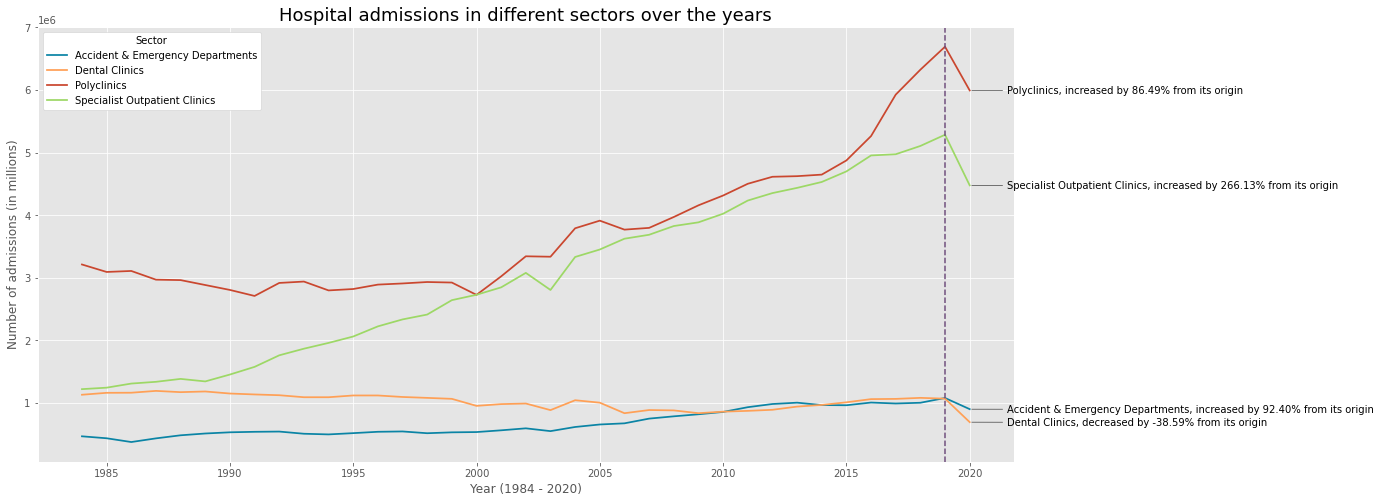

In [53]:
# Line chart Y
linechart_Accident_and_Emergency_Departments = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Accident & Emergency Departments']['value']
linechart_Acute_Hospitals_Admissions = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Acute Hospitals Admissions']['value'] #
linechart_Community_Hospitals_Admissions = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Community Hospitals Admissions']['value'] #
linechart_Day_Surgeries = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Day Surgeries']['value']
linechart_Dental_Clinics = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Dental Clinics']['value']
linechart_Polyclinics = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Polyclinics']['value']
linechart_Psychiatric_Hospitals_Admissions = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Psychiatric Hospitals Admissions']['value'] #
linechart_Specialist_Outpatient_Clinics = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Specialist Outpatient Clinics']['value']

# Line chart X
x = np.unique(hospital_admissions_cleaned['year'])

# Relative Percentage from origin
percentage_ANE = ((linechart_Accident_and_Emergency_Departments[-1] - linechart_Accident_and_Emergency_Departments[0]) / linechart_Accident_and_Emergency_Departments[0]) * 100
percentage_DC = ((linechart_Dental_Clinics[-1] - linechart_Dental_Clinics[0]) / linechart_Dental_Clinics[0]) * 100
percentage_PC = ((linechart_Polyclinics[-1] - linechart_Polyclinics[0]) / linechart_Polyclinics[0]) * 100
percentage_SC = ((linechart_Specialist_Outpatient_Clinics[-1] - linechart_Specialist_Outpatient_Clinics[0]) / linechart_Specialist_Outpatient_Clinics[0]) * 100

with plt.style.context('ggplot'):
    # Subplot with row 1 & col 1
    fig, ax = plt.subplots(figsize=(17.5, 8))
    # fig.set_facecolor("lightblue")

    # Figure 1
    ax.plot(x, linechart_Accident_and_Emergency_Departments ,color='#0B84A5', linewidth=1.75, label='Accident & Emergency Departments')
    ax.annotate(f'Accident & Emergency Departments, increased by {percentage_ANE:.2f}% from its origin', xy=(x[-1], 903361), xytext=(x[-1] + 1.5, 903361 - 50000), arrowprops=dict(color ='black',arrowstyle="-"),xycoords="data")
    # Figure 2
    ax.plot(x, linechart_Dental_Clinics ,color='#FFA056', linewidth=1.75, label='Dental Clinics')
    ax.annotate(f'Dental Clinics, decreased by {percentage_DC:.2f}% from its origin', xy=(x[-1], 695921), xytext=(x[-1] + 1.5, 695921 - 50000), arrowprops=dict(color ='black',arrowstyle="-"),xycoords="data")
    # Figure 3
    ax.plot(x, linechart_Polyclinics ,color='#CA472F', linewidth=1.75, label='Polyclinics')
    ax.annotate(f'Polyclinics, increased by {percentage_PC:.2f}% from its origin', xy=(x[-1], 5992676), xytext=(x[-1] + 1.5, 5992676 - 50000), arrowprops=dict(color ='black',arrowstyle="-"),xycoords="data")
    # Figure 4
    ax.plot(x, linechart_Specialist_Outpatient_Clinics ,color='#9DD866', linewidth=1.75, label='Specialist Outpatient Clinics')
    ax.annotate(f'Specialist Outpatient Clinics, increased by {percentage_SC:.2f}% from its origin', xy=(x[-1], 4477097), xytext=(x[-1] + 1.5, 4477097 - 50000), arrowprops=dict(color ='black',arrowstyle="-"),xycoords="data")

    # Highlighting anomalies
    ax.axvline(2019, 0, 1, linestyle="--", color="#6F4E7C")

    # displaying the figure
    ax.set_title("Hospital admissions in different sectors over the years", fontsize=18)
    ax.set_ylabel("Number of admissions (in millions)")
    ax.set_xlabel("Year (1984 - 2020)")
    ax.legend(facecolor='white', framealpha=1, title="Sector")
    plt.show()

### Insights
- Every sector has experienced a positive increase in the number of admissions, except the dental clinic sector, which was the only sector to experience a drop in the number of admissions.
- The sector that experienced the greatest growth is the specialist outpatient clinic sector, which saw an increase of over 266.13%.
- The top 3 sectors that gained the most number of patients are Specialist Outpatient Clinics(266.13%), Accident & Emergency Departments(92.40%) and Polyclinics (86.49%)
- In 2019, every sector experienced a drop in admissions throughout all sectors. This is due to the covid-19 pandemic. As such, many people avoid and reduce their visits to the hospital. In addition, many non-critical procedures were also deferred. As a result of this confluence of factors, the number of attendees decreased.

^ From this, we can see that the fact that there are greater patient admissions are true and have been ever growing since 1984!

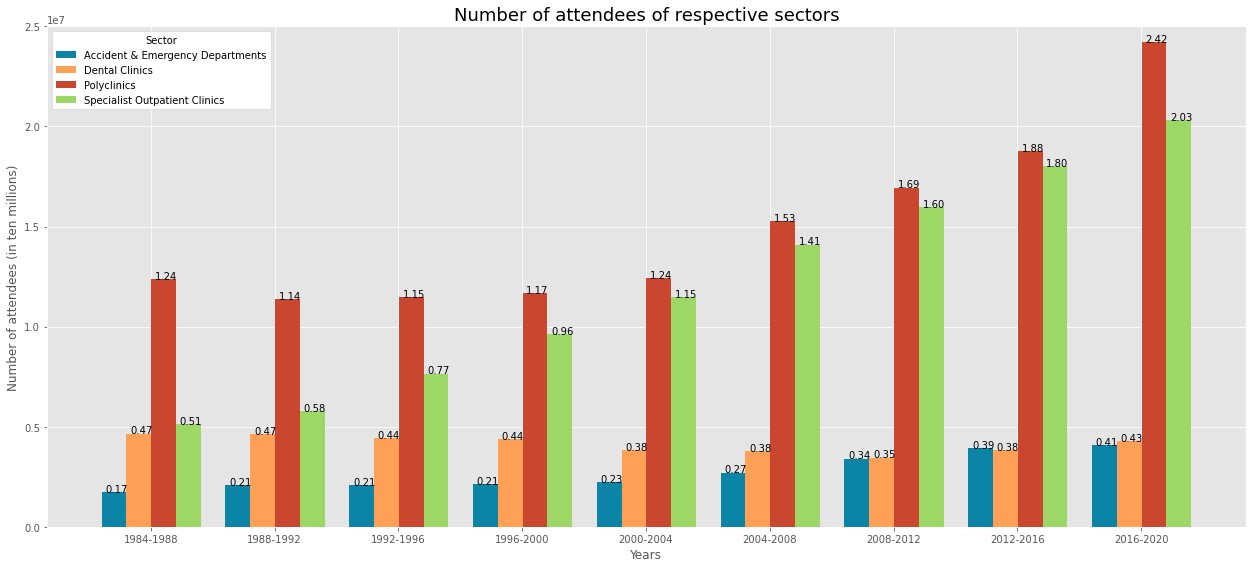

In [54]:
# For the Y axis
year = 1984
selective_years = []
column_alternator = ['Accident & Emergency Departments', 'Dental Clinics', 'Polyclinics', 'Specialist Outpatient Clinics']

for i in range(10):
    selective_years.append(year)
    year += 4

# Variables that will be used for the plotting
big_container = [[], [], [], []]
for i in range(len(column_alternator)):
    # Extracts all the value for each sector first
    for n in range(len(selective_years) - 1):
        big_container[i].append(hospital_admissions_cleaned[(hospital_admissions_cleaned['level_1'] == column_alternator[i]) & (
            (hospital_admissions_cleaned['year'] >= selective_years[n]) & (hospital_admissions_cleaned['year'] < selective_years[n+1]))]['value'].sum())

# Configuration
bar_width = 0.4
width = 0.8 / len(big_container)
colors = ["#0B84A5", "#FFA056", "#CA472F", "#9DD866"]
labels = ["1984-1988", "1988-1992", "1992-1996", "1996-2000", "2000-2004", "2004-2008", "2008-2012", "2012-2016", "2016-2020"]

with plt.style.context('ggplot'):
    # Subplot with row 1 & col 1
    fig, ax = plt.subplots(figsize=(17.5, 8), tight_layout=True)

    # Figures
    Pos = np.array(range(len(big_container[0]))) 
    for i in range(len(big_container)):
        ax.bar(Pos + i * width, big_container[i], width = width, label = column_alternator[i], color = colors[i])
        for k in range(len(big_container[0])):
            ax.annotate(f"{big_container[i][k]/10000000:.2f}", (Pos[k] - 0.07 + i * width, big_container[i][k]))

    plt.xticks(Pos + bar_width / 1.35, labels)
    plt.ylim(0, 25000000)

    # Displaying the figure
    plt.title("Number of attendees of respective sectors", fontsize = 18)
    plt.xlabel("Years")
    plt.ylabel("Number of attendees (in ten millions)")
    ax.legend(facecolor = 'white', framealpha = 1, title = "Sector")
    plt.show()

### Insights
- The number of people attending accident and emergency departments, as well as specialist outpatient clinics, has been steadily increasing over the last four years.
- However, on the other hand, the same could not be said for dental clinics. The number of dental clinics has been steadly declining, from 4657660 in 1984-1988, to 4285060 in 2016-2020
- Other notable features are polyclinics. The number of attendees decreased from 12388368 in 1984-1988 to 12433672 in 2000-2004, but the trend has since rebounded and has been seeing an upward growth, making the number of attendees the highest ever since, at 24204895 in 2016-2020.

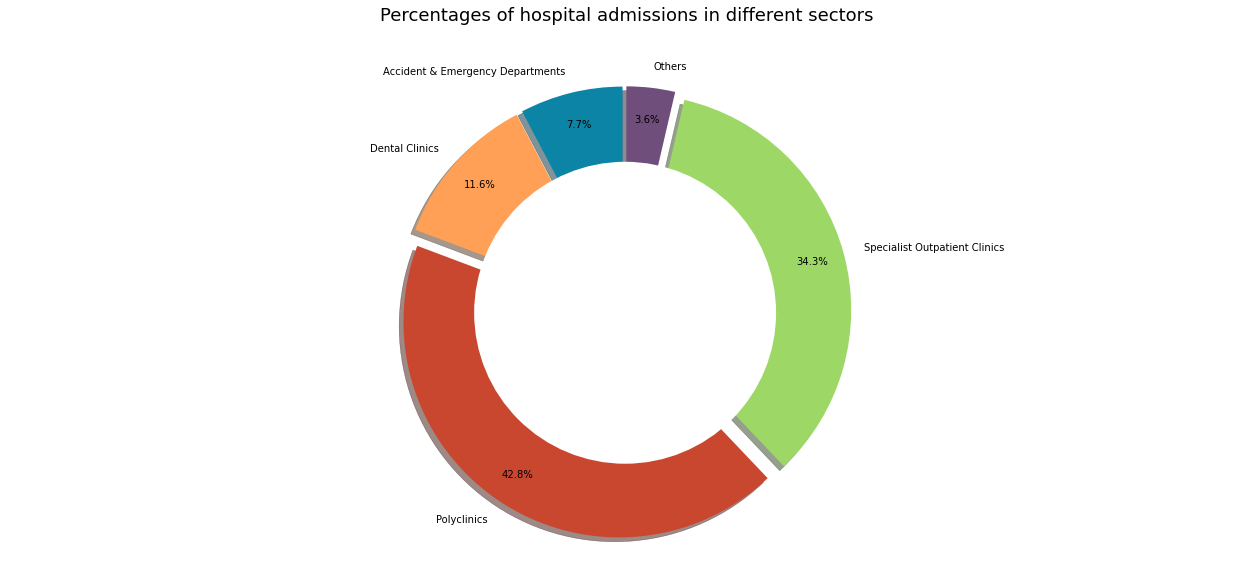

In [9]:
# Pie chart Y
piechart_Accident_and_Emergency_Departments = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Accident & Emergency Departments']['value'].sum()
piechart_Acute_Hospitals_Admissions = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Acute Hospitals Admissions']['value'].sum()
piechart_Community_Hospitals_Admissions = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Community Hospitals Admissions']['value'].sum()
piechart_Day_Surgeries = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Day Surgeries']['value'].sum()
piechart_Dental_Clinics = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Dental Clinics']['value'].sum()
piechart_Polyclinics = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Polyclinics']['value'].sum()
piechart_Psychiatric_Hospitals_Admissions = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Psychiatric Hospitals Admissions']['value'].sum()
piechart_Specialist_Outpatient_Clinics = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Specialist Outpatient Clinics']['value'].sum()

# The initial plan was to represent each sector in the piechart. However, because the figures for day surgeries, community hospital admissions, acute hospital admissions, and psychiatric hospital values were too small, it wasn't representive at all. Hence, I decided to combine them instead.
piechart_data = [piechart_Accident_and_Emergency_Departments, piechart_Dental_Clinics, piechart_Polyclinics, piechart_Specialist_Outpatient_Clinics, (piechart_Day_Surgeries + piechart_Community_Hospitals_Admissions + piechart_Acute_Hospitals_Admissions + piechart_Psychiatric_Hospitals_Admissions)]

# configuration to the pie chart
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
colors = ["#0B84A5", "#FFA056", "#CA472F", "#9DD866", "#6F4E7C"]
labels = ['Accident & Emergency Departments', 'Dental Clinics', 'Polyclinics', 'Specialist Outpatient Clinics', 'Others']

with plt.style.context('ggplot'):
    # Subplot with row 1 & col 1
    fig, ax = plt.subplots(figsize = (17.5, 8), tight_layout = True)

    #Figure 1
    ax.pie(piechart_data, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90, pctdistance = 0.85, colors = colors)
    centre_circle = plt.Circle((0, 0), 0.70, fc = 'white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    ax.axis('equal')

    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title("Percentages of hospital admissions in different sectors", y = 1.08, fontsize = 18)
    plt.show()
    
    # Personal journal before transfering to the powerpoint
    # - This was initially the plan, however, due to figures such as day surgeries, community hospital admissions, acute hospital admissions values being so small, I decided to merge the data of those instead

### Insights
- From the donut chart, the polyclinic sector has received the most number of admissions at 43.3%.
- On the other hand, the total of the others which are day surgeries, community hospitals, acute hospitals, and psychiatric hospitals sectors, account for 3.7% of all patients. Hence, recieving the fewest admissions.
- The top 3 sectors are Polyclincs (42.8%), Speciallist Outpatient Clinics (34.3%) and dental clinics (11.6%).

^ As such, from this, we can see the number which sectors recieve the greatest number of admissions, allowing us to understand that we should allocate greater fundings into polyclinics

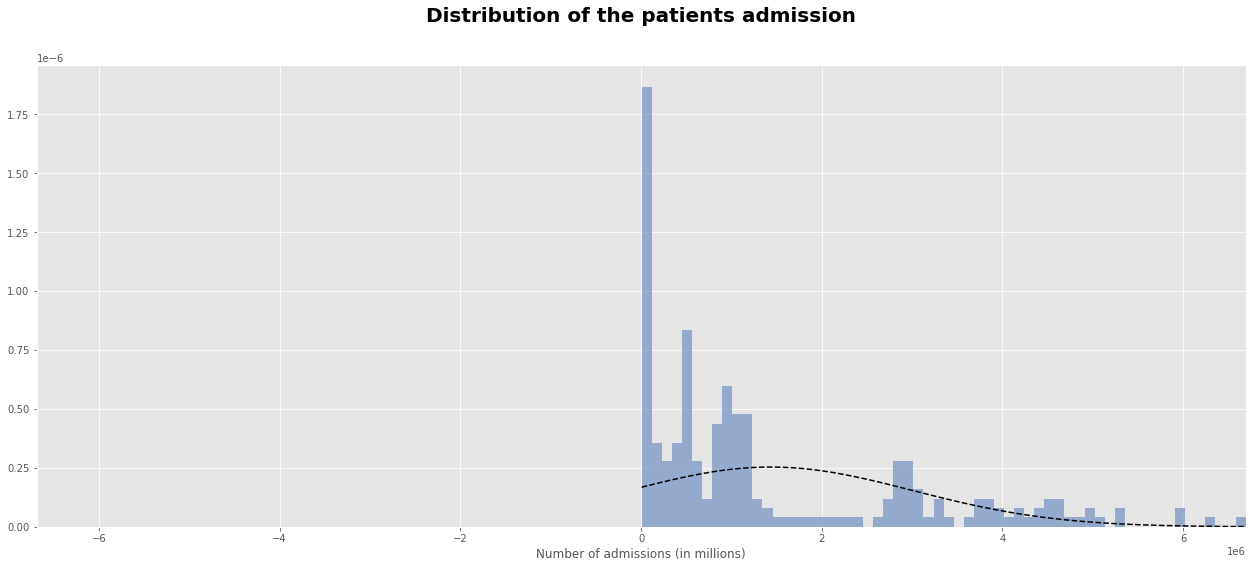

In [55]:
# Histogram
histogram_data = hospital_admissions_cleaned['value']

# Configurations
mu = 1434276.725663717  # mean of distribution
sigma = 1574253.3692067433  # standard deviation of distribution
num_bins = 60

with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(17.5, 8), tight_layout=True)
    # Plotting the histogram
    n, bins, patches = ax.hist(histogram_data, num_bins, density=True, facecolor='#7995C4', alpha=0.75, linewidth =1)

    # Plotting the trendline
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    ax.plot(bins, y, '--', color="black")

    # Plotting
    plt.title("Distribution of the patients admission", y=1.08, fontsize=20, fontweight=700)
    ax.set_xlabel("Number of admissions (in millions)")
    ax.set_xlim(-histogram_data.max(),histogram_data.max())
    plt.show()

# https://matplotlib.org/stable/gallery/statistics/histogram_features.html

### Insights
- The histogram shows a one tail positive skewed distribution towards the right.
- values are concentrated to the lower values (left side)

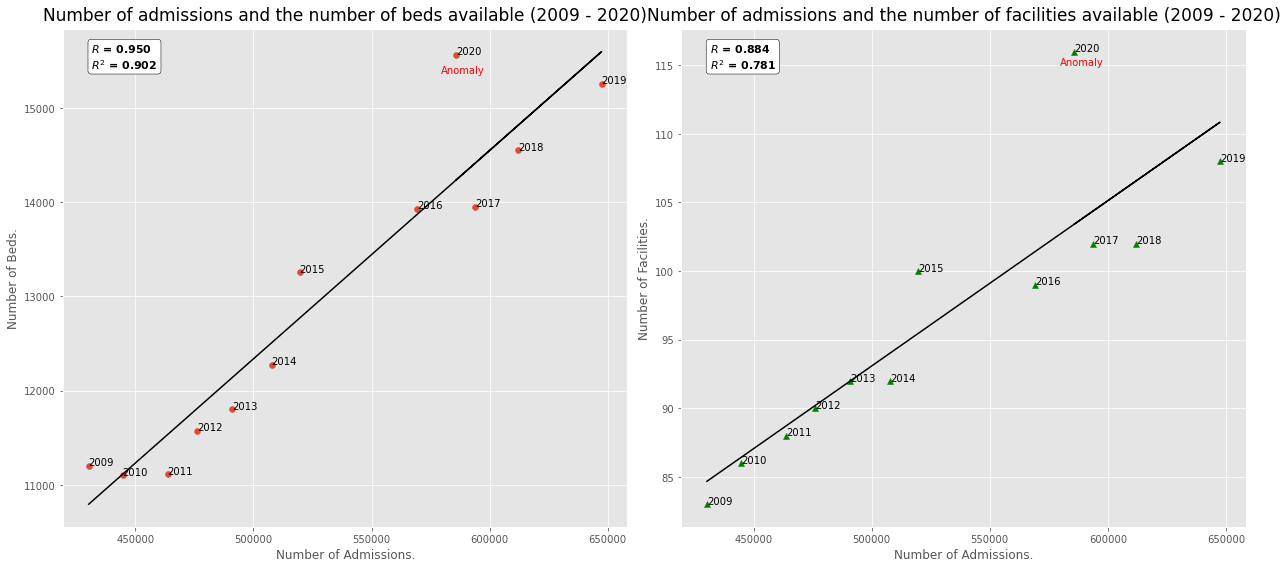

In [11]:
import math
# Assignment of variables - Y Axis
# This variables are mainly for the number of admissions, from hospital_admissions_cleaned
number_of_admissions = hospital_admissions_cleaned[hospital_admissions_cleaned['year'] >= 2009]
number_of_admissions = number_of_admissions[(number_of_admissions['level_1'] == "Acute Hospitals Admissions") | (number_of_admissions['level_1'] =="Psychiatric Hospitals Admissions") | (number_of_admissions['level_1'] =="Community Hospitals Admissions")]
# This variables are mainly for the number of beds, from facilities_and_bed_cleaned
number_of_beds = facilities_and_bed_cleaned[(facilities_and_bed_cleaned['facility_type_a'] == "Acute") | (facilities_and_bed_cleaned['facility_type_a'] == "Psychiatric Hospitals") | (facilities_and_bed_cleaned['facility_type_a'] == "Community Hospitals")]
number_of_facilities = []
unique_admission_years = np.unique(facilities_and_bed_cleaned['year'])
# Lists to store the x and y value
container_of_beds = []
container_of_admissions = []
container_of_facilities = []

for i in range(len(unique_admission_years)):
    container_of_beds.append(number_of_beds[number_of_beds['year'] == unique_admission_years[i]]['no_beds'].sum())
    container_of_facilities.append(facilities_and_bed_cleaned[facilities_and_bed_cleaned['year'] == unique_admission_years[i]]['no_of_facilities'].sum())
    container_of_admissions.append(number_of_admissions[number_of_admissions['year'] == unique_admission_years[i]]["value"].sum())

# modifying the array to be a numpy array
container_of_beds = np.array(container_of_beds)
container_of_admissions = np.array(container_of_admissions)

box = {'facecolor': 'white',
       'edgecolor': 'black',
       'boxstyle': 'round'
      }

# Polynomial Regression
def PolyRegress(x_values, y_values):
    my_fitting = np.polyfit(x_values, y_values, 1, full=True)
    coeff = my_fitting[0]

    ### Residual or Sum of Square Error (SSE)
    SSE = my_fitting[1][0]

    ### Determining the Sum of Square Total (SST)
    ## the squared differences between the observed dependent variable and its mean
    diff = y_values - y_values.mean()
    square_diff = diff ** 2
    SST = square_diff.sum()

    ###  Now getting the coefficient of determination (R2)
    R2 = 1 - SSE/SST
    return([math.sqrt(R2),R2])

with plt.style.context('ggplot'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17.5, 8), tight_layout=True)

    # Subplot 1
    ax1.scatter(container_of_admissions, container_of_beds)
    [R1, R2] = PolyRegress(container_of_admissions, container_of_beds)
    ax1.set_ylabel("Number of Beds.")
    ax1.set_xlabel("Number of Admissions.")
    ax1.set_title("Number of admissions and the number of beds available (2009 - 2020)", y=1.005, fontsize=17)
    ax1.text(0.05, 0.92, f'$R$ = {R1:.3f}\n$R^2$ = {R2:.3f}', fontweight="bold", transform=ax1.transAxes, backgroundcolor="white", fontdict={'weight': 'bold', 'size': 11}, bbox= box)

    for i, txt in enumerate(unique_admission_years):
        ax1.annotate(txt, (container_of_admissions[i], container_of_beds[i]))

    ax1.text(container_of_admissions[-1] - 6300,  container_of_beds[-1] - 200, "Anomaly", color="red")
    # calc the trendline (it is simply a linear fitting)
    z = np.polyfit(container_of_admissions, container_of_beds, 1)
    p = np.poly1d(z)
    ax1.plot(container_of_admissions,p(container_of_admissions),  color="black")

    # Subplot 2
    ax2.scatter(container_of_admissions, container_of_facilities, marker="^", color="green")
    [R1, R2] = PolyRegress(container_of_admissions, np.array(container_of_facilities))
    ax2.set_ylabel("Number of Facilities.")
    ax2.set_xlabel("Number of Admissions.")
    ax2.set_title("Number of admissions and the number of facilities available (2009 - 2020)", y=1.005, fontsize=17)
    plt.text(0.05, 0.92, f'$R$ = {R1:.3f}\n$R^2$ = {R2:.3f}', fontweight="bold", transform=ax2.transAxes, backgroundcolor="white", fontdict={'weight': 'bold', 'size': 11}, bbox= box)

    for i, txt in enumerate(unique_admission_years):
        ax2.annotate(txt, (container_of_admissions[i], container_of_facilities[i]))

    ax2.text(container_of_admissions[-1] - 6300, container_of_facilities[-1] - 1, "Anomaly", color="red")
    # calc the trendline (it is simply a linear fitting)
    z = np.polyfit(container_of_admissions, container_of_facilities, 1)
    p = np.poly1d(z)
    ax2.plot(container_of_admissions,p(container_of_admissions), color="black")

# Personal journal before transfering to the powerpoint
# To be reflective of the actual changes, I only have targetted sectors that are similar in both data sheet. As such i only can target acute hospital admissions, Psychiatric Hospitals Admissions and Community Hospitals Admissions as they both have these similar sectors

### Insights
- As the number of patients increases, the number of beds also increases. This is due to the need of increasing number of beds to accommodate the number of patients.
- As such, this suggests that to accomodate the rising number of admissions, a greater amount of beds was also needed to accommodate patients.

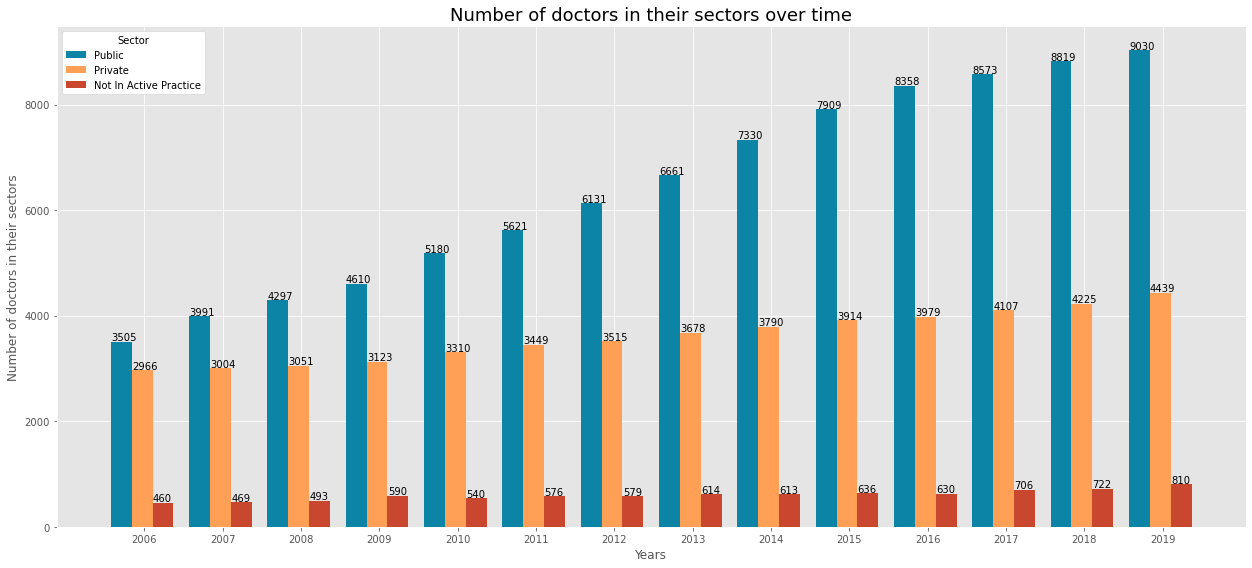

In [56]:
# For the Y axis
year = 1984
selective_years = np.unique(number_of_doctors['year'])
column_alternator = ['Public', 'Private', 'Not In Active Practice']

big_container = [[], [], []]
for i in range(len(column_alternator)):
    # Extracts all the value for each sector first
    for n in range(len(selective_years)):
        big_container[i].append(number_of_doctors[(number_of_doctors['sector'] == column_alternator[i]) & ((number_of_doctors['year'] == selective_years[n]))]['count'].sum())

# Configuration
bar_width = 0.4
width = 0.8 / len(big_container)
colors = ["#0B84A5", "#FFA056", "#CA472F"]
labels = selective_years

with plt.style.context('ggplot'):
    # Subplot with row 1 & col 1
    fig, ax = plt.subplots(figsize=(17.5, 8), tight_layout=True)

    # Figures
    Pos = np.array(range(len(big_container[0]))) 
    for i in range(len(big_container)):
        ax.bar(Pos + i * width, big_container[i], width = width, label = column_alternator[i], color = colors[i])
        for k in range(len(big_container[0])):
            ax.annotate(f"{big_container[i][k]}", (Pos[k] - 0.13 + i * width, big_container[i][k] + 25))

    plt.xticks(Pos + bar_width / 1.35, labels)
    #plt.ylim(0, 25000000)

    # Displaying the figure
    plt.title("Number of doctors in their sectors over time", fontsize = 18)
    plt.xlabel("Years")
    plt.ylabel("Number of doctors in their sectors")
    ax.legend(facecolor = 'white', framealpha = 1, title = "Sector")
    plt.show()

    # Find out how doctors have been facing

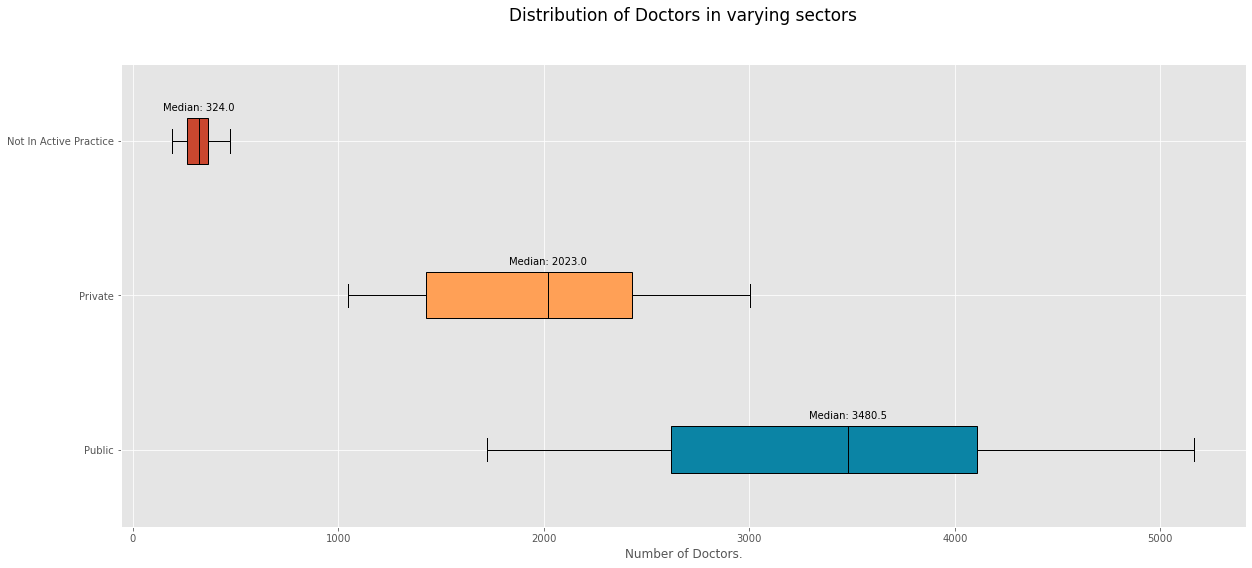

In [58]:
# Y values
x1 = number_of_doctors[number_of_doctors['sector'] == "Public"]['count']
x2 = number_of_doctors[number_of_doctors['sector'] == "Private"]['count']
x3 = number_of_doctors[number_of_doctors['sector'] == "Not In Active Practice"]['count']
data = [x1,x2,x3]
color = ["#0B84A5", "#FFA056", "#9DD866"]
labels = ["Public", "Private", "Not In Active Practice"]

with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(17.5, 8), tight_layout=True)
    bp = ax.boxplot(data, labels=labels, vert=False, patch_artist = True,)

    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    for median in bp['medians']:
        median.set(color ='black',linewidth = 1)

    for line in bp['medians']:
        # get position data for median line
        x, y = line.get_xydata()[1] # top of median line
        # overlay median value
        ax.text(x, y + 0.05, f"Median: {x}", horizontalalignment='center') # draw above, centered

    ax.set_xlabel("Number of Doctors.")
    ax.set_title("Distribution of Doctors in varying sectors", y = 1.08, fontsize = 17)

    plt.show()

### Insight
- Most doctors can be found in the public sector
- The boxplot of doctors that are not in active practise is relatively short, suggesting that the 

## Conclusion

---

Hence, after looking at all these graphs, we are able to gain some insights:
- Patient admission in Singapore is increasing over time.
- More funding, facilities, bed should be dedicated and trained towards Polyclinics as Polyclinics admissions rate have increased the most within all the sectors


## solutions

---

Hence, lets solve and plot a solution for the future:
- Less funding should be dedicated towards sectors such as the dental industry due to the already dropping rates of admissions.
- More polyclinics can be constructed around neighbourhoods in order to spread the number of admissions for each polyclinics. This will not only reduce the budern of workload on the polyclinics doctors, but also improve the experience as a whole
- The rate of doctors being trained can be increased, due to the increase prevalance of the number of admissions. This will help reduce their workload, thus avoiding medical accidents. 


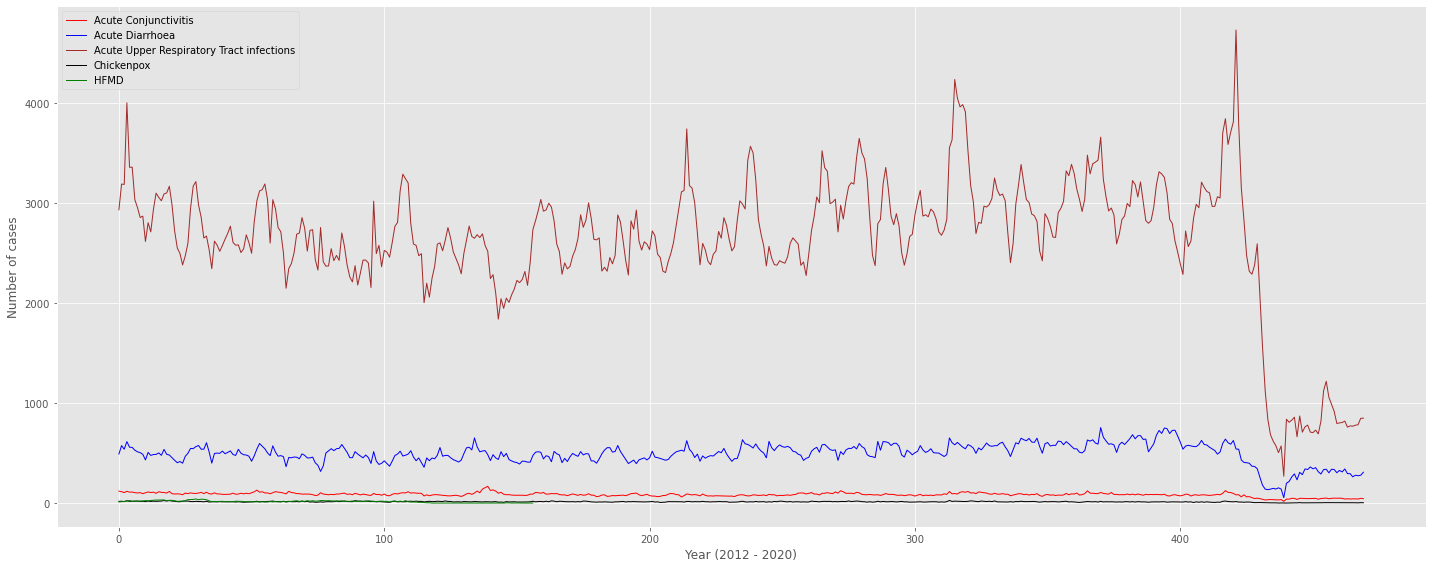

In [13]:
linechart_Acute_Conjunctivitis = daily_attendances_selected_diseases[daily_attendances_selected_diseases['disease']=="Acute Conjunctivitis"]["no_of_cases"]
linechart_Acute_Diarrhoea = daily_attendances_selected_diseases[daily_attendances_selected_diseases['disease']=="Acute Diarrhoea"]["no_of_cases"]
linechart_Acute_Upper_Respiratory_Tract_infections = daily_attendances_selected_diseases[daily_attendances_selected_diseases['disease']=="Acute Upper Respiratory Tract infections"]["no_of_cases"]
linechart_Chickenpox = daily_attendances_selected_diseases[daily_attendances_selected_diseases['disease']=="Chickenpox"]["no_of_cases"]
linechart_HFMD = daily_attendances_selected_diseases[daily_attendances_selected_diseases['disease']=="HFMD"]["no_of_cases"]

linechart_Polyclinics = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Polyclinics']['value']

# Line chart X
x = np.unique(daily_attendances_selected_diseases['epi_week'])
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(20, 8), tight_layout=True)
    ax.plot(linechart_Acute_Conjunctivitis ,color='red', linewidth=1.0, label='Acute Conjunctivitis')
    # calc the trendline (it is simply a linear fitting)
    #z = np.polyfit(x, linechart_Acute_Conjunctivitis, 1)
    #p = np.poly1d(z)
    #ax.plot(x, p(x), "--", color="blue")


    ax.plot(linechart_Acute_Diarrhoea ,color='blue', linewidth=1.0, label='Acute Diarrhoea')
    ax.plot(linechart_Acute_Upper_Respiratory_Tract_infections ,color='brown', linewidth=1.0, label='Acute Upper Respiratory Tract infections')
    ax.plot(linechart_Chickenpox ,color='black', linewidth=1.0, label='Chickenpox')
    ax.plot(linechart_HFMD ,color='green', linewidth=1.0, label='HFMD')

    # displaying the figure
    ax.legend()
    plt.ylabel("Number of cases")
    plt.xlabel("Year (2012 - 2020)")
    plt.show()


In [14]:
# Line chart Y
piechart_Accident_and_Emergency_Departments = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Accident & Emergency Departments']['value'].sum()
piechart_Acute_Hospitals_Admissions = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Acute Hospitals Admissions']['value'].sum()
piechart_Community_Hospitals_Admissions = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Community Hospitals Admissions']['value'].sum()
piechart_Day_Surgeries = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Day Surgeries']['value'].sum()
piechart_Dental_Clinics = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Dental Clinics']['value'].sum()
piechart_Polyclinics = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Polyclinics']['value'].sum()
piechart_Psychiatric_Hospitals_Admissions = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Psychiatric Hospitals Admissions']['value'].sum()
piechart_Specialist_Outpatient_Clinics = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Specialist Outpatient Clinics']['value'].sum()

data = [piechart_Accident_and_Emergency_Departments, piechart_Acute_Hospitals_Admissions, piechart_Community_Hospitals_Admissions, piechart_Day_Surgeries, piechart_Dental_Clinics, piechart_Polyclinics, piechart_Psychiatric_Hospitals_Admissions, piechart_Specialist_Outpatient_Clinics]

labels = ["A", "B", "C", "D", "E", "F", "G", "H"]
# Configuration
width =0.3

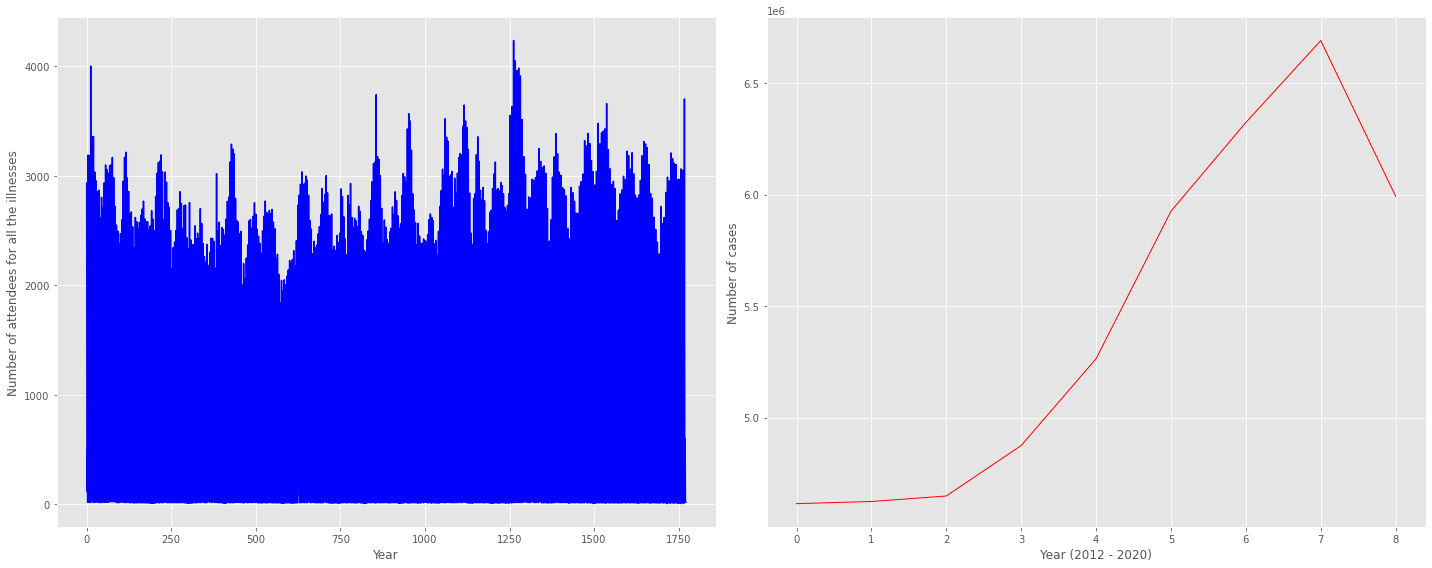

In [15]:
linechart_Acute_Conjunctivitis = daily_attendances_selected_diseases[daily_attendances_selected_diseases['disease']=="Acute Conjunctivitis"]["no_of_cases"]
linechart_Acute_Diarrhoea = daily_attendances_selected_diseases[daily_attendances_selected_diseases['disease']=="Acute Diarrhoea"]["no_of_cases"]
linechart_Acute_Upper_Respiratory_Tract_infections = daily_attendances_selected_diseases[daily_attendances_selected_diseases['disease']=="Acute Upper Respiratory Tract infections"]["no_of_cases"]
linechart_Chickenpox = daily_attendances_selected_diseases[daily_attendances_selected_diseases['disease']=="Chickenpox"]["no_of_cases"]
linechart_HFMD = daily_attendances_selected_diseases[daily_attendances_selected_diseases['disease']=="HFMD"]["no_of_cases"]
linechart_Polyclinics_specifics = hospital_admissions_cleaned[(hospital_admissions_cleaned['level_1'] == 'Polyclinics') & (hospital_admissions_cleaned['year'] >= 2012)]['value']
yearly_data = []
for i in range(len(linechart_Acute_Conjunctivitis)):
    yearly_data.append(linechart_Acute_Conjunctivitis[i] + linechart_Acute_Diarrhoea[i] + linechart_Acute_Upper_Respiratory_Tract_infections[i] + linechart_Chickenpox[i])

filtered_data = []
for i in range(len(daily_attendances_selected_diseases)):
    if "2020" not in daily_attendances_selected_diseases[i]['epi_week']: 
        filtered_data.append(daily_attendances_selected_diseases[i]["no_of_cases"])
filtered_data = np.array(filtered_data)

# Line chart X
x = np.unique(daily_attendances_selected_diseases['epi_week'])
with plt.style.context('ggplot'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), tight_layout=True)
    # Subplot 1
    ax1.plot(filtered_data ,color='blue', label='Acute Conjunctivitis')
    ax1.set_ylabel("Number of attendees for all the illnesses")
    ax1.set_xlabel("Year")
    # calc the trendline (it is simply a linear fitting)
    

    # Subplot 2
    ax2.plot(linechart_Polyclinics_specifics ,color='red', linewidth=1.0, label='Acute Conjunctivitis')
    ax2.set_ylabel("Number of attendees for Polyclinics")
    ax2.set_xlabel("Year")

    # displaying the figure
    ax.legend()
    plt.ylabel("Number of cases")
    plt.xlabel("Year (2012 - 2020)")
    plt.show()
